# Topic Modelling LSA & LDA

## Import Library

### Library yang digunakan

- **Pandas**

- **matplotlib**

- **PySastrawi**

- **scikit-learn**

- **WordCloud**

In [1]:
# visualisasi data dan manipulasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from wordcloud import WordCloud

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')

# Pre-processing
import re
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Melakukan setting jumlah kolom maksimal pada output
pd.options.display.max_columns = 10

## Membaca Data

Dataset yang digunakan : [link](https://github.com/DipoLahelas/PPW/blob/main/hasil-crawl.csv)

Dataset yang digunakan merupakan hasil dari crawling jurnal pta yang telah diambil tadi dan juga ditambahi label.

In [3]:
df = pd.read_csv('Hasil_Text_Preprocessing.csv')

In [4]:
df.head()

,Unnamed: 0,judul_TA,abstrak,abstrak_tokens,abstrak_tokens_fdist,abstrak_tokens_WSW,abstrak_normalized,abstrak_tokens_stemmed
0,0,PENGARUH PERILAKU KONSUMEN TERHADAP KEPUTUSAN ...,abstrak haryono arifin pengaruh perilaku konsu...,"['abstrak', 'haryono', 'arifin', 'pengaruh', '...",<FreqDist with 76 samples and 162 outcomes>,"['haryono', 'arifin', 'pengaruh', 'perilaku', ...","['haryono', 'arifin', 'pengaruh', 'perilaku', ...","['haryono', 'arifin', 'pengaruh', 'perilaku', ..."
1,1,PENGARUH DIMENSI KUALITAS PELAYANAN TERHADAP K...,abstrak tujuan penelitian ini adalah untuk men...,"['abstrak', 'tujuan', 'penelitian', 'ini', 'ad...",<FreqDist with 70 samples and 136 outcomes>,"['tujuan', 'penelitian', 'mengidentifikasi', '...","['tujuan', 'penelitian', 'mengidentifikasi', '...","['tuju', 'teliti', 'identifikasi', 'variabelva..."
2,2,Analisis Inovasi Dan Keunggulan Bersaing \r\nD...,abstrak tujuan penelitian ini adalah mendeskri...,"['abstrak', 'tujuan', 'penelitian', 'ini', 'ad...",<FreqDist with 82 samples and 126 outcomes>,"['tujuan', 'penelitian', 'mendeskripsikan', 'i...","['tujuan', 'penelitian', 'mendeskripsikan', 'i...","['tuju', 'teliti', 'deskripsi', 'inovasi', 'un..."
3,3,Pengaruh Retailing Mix terhadap Keputusan Pemb...,tujuan penelitian ini adalah untuk mengetahui ...,"['tujuan', 'penelitian', 'ini', 'adalah', 'unt...",<FreqDist with 95 samples and 232 outcomes>,"['tujuan', 'penelitian', 'pengaruh', 'variabel...","['tujuan', 'penelitian', 'pengaruh', 'variabel...","['tuju', 'teliti', 'pengaruh', 'variabel', 're..."
4,4,ANALISIS TINGKAT RISIKO KREDIT \r\nPADA PD. BP...,hasil dari penelitian ini dari perhitungan cre...,"['hasil', 'dari', 'penelitian', 'ini', 'dari',...",<FreqDist with 46 samples and 91 outcomes>,"['hasil', 'penelitian', 'perhitungan', 'credit...","['hasil', 'penelitian', 'perhitungan', 'credit...","['hasil', 'teliti', 'hitung', 'credit', 'risk'..."


Data yang digunakan dalam program ini hanya data pada kolom 'abstrak'. Untuk mengambil kolom 'abstrak' saja dapat dilakukan dengan inisialisasi ulang df dengan df[['abstrak']] 

In [5]:
df = df[['abstrak']]
df.head()

,abstrak
0,abstrak haryono arifin pengaruh perilaku konsu...
1,abstrak tujuan penelitian ini adalah untuk men...
2,abstrak tujuan penelitian ini adalah mendeskri...
3,tujuan penelitian ini adalah untuk mengetahui ...
4,hasil dari penelitian ini dari perhitungan cre...


## Ekstraksi fitur dan membuat Document Term Matrix (DTM)

Dalam perhitungan LSA (Latent Semantic Analysis) data yang diperlukan hanya TF-IDF. Sehingga pada program ini tidak perlu mencari nilai TF dari dokumen. Untuk mengetahui nilai TF-IDF dapat dilakukan dengan membuat objek dari kelas TfidfVectorizer yang disediakan library scikit-learn.

Rumus Term Frequency (TF):

$$
tf(t,d) = { f_{ t,d } \over \sum_{t' \in d } f_{t,d}}
$$

$ f_{ t,d } \quad\quad\quad\quad$: Jumlah kata t muncul dalam dokumen

$ \sum_{t' \in d } f_{t,d} \quad\quad$: Jumlah seluruh kata yang ada dalam dokumen

Rumus Inverse Document Frequency (IDF):

$$
idf( t,D ) = log { N \over { | \{ d \in D:t \in d \} | } }
$$

$ N \quad\quad\quad\quad\quad$ : Jumlah seluruh dokumen

$ | \{ d \in D:t \in d \} | $ : Jumlah dokumen yang mengandung kata $ t $

Rumus TF - IDF:

$$
tfidf( t,d,D ) = tf( t,d ) \times idf( t,D )
$$

In [6]:
vect = TfidfVectorizer()

Setelah objek **TfidfVectorizer** dibuat gunakan method **fit_transform** dengan argumen data yang akan dicari nilai **TF-IDF**-nya

In [7]:
vect_text = vect.fit_transform(df['abstrak'])

In [8]:
attr_count = vect.get_feature_names_out().shape[0]
print(f'Jumlah atribut dalam Document-Term Matrix : {attr_count}')

Jumlah atribut dalam Document-Term Matrix : 1324


#### Menyimpan hasil tfidf ke dalam DataFrame

Hasil tfidf perlu diubah terlebih dahulu menjadi array agar dapat digunakan sebagai data. Kemudian untuk parameter kolom-nya dapat didapatkan menggunakan method get_feature_names_out pada objek TfidfVectorizer.

In [9]:
tfidf = pd.DataFrame(
    data=vect_text.toarray(),
    columns=vect.get_feature_names_out()
)
tfidf.head()

,abidin,abstrak,abtrak,accidental,acer,...,yakni,yamaha,yang,yustina,zscore
0,0.0,0.033781,0.0,0.000000,0.0,...,0.0,0.0,0.107217,0.0,0.0
1,0.0,0.044098,0.0,0.069933,0.0,...,0.0,0.0,0.139964,0.0,0.0
2,0.0,0.035776,0.0,0.000000,0.0,...,0.0,0.0,0.056776,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.221425,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.022687,0.0,0.0


Mencari nilai **idf** dengan mengakses atribut **idf_** pada objek **tfidfVectorizer**. Atribut **idf_** hanya terdefinisi apabila parameter **use_idf** saat instansiasi objekk tfidfVectorizer bernilai **True**. Namun, **use_idf** sudah bernilai **True** secara default, sehingga kita dapat perlu menentukannya secara manual. 

In [10]:
idf = vect.idf_

In [11]:
dd= dict(zip(vect.get_feature_names_out(), idf))

l = sorted(dd, key = dd.get)

Kita dapat melihat kata yang paling sering dan paling jarang muncul pada judul tugas akhir berdasarkan nilai idf. Kata yang memiliki nilai lebih kecil, adalah kata yang paling sering muncul dalam judul

In [12]:
print("5 Kata yang sering muncul:")
for i, word in enumerate(l[:5]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata yang sering muncul:
1. dan	(Nilai idf: 1.0202027073175195)
2. ini	(Nilai idf: 1.0408219945202553)
3. penelitian	(Nilai idf: 1.0408219945202553)
4. yang	(Nilai idf: 1.0408219945202553)
5. terhadap	(Nilai idf: 1.127833371509885)


In [13]:
print("5 Kata yang jarang muncul:")
for i, word in enumerate(l[:-5:-1]):
    print(f"{i+1}. {word}\t(Nilai idf: {dd[word]})")

5 Kata yang jarang muncul:
1. zscore	(Nilai idf: 4.218875824868201)
2. yamaha	(Nilai idf: 4.218875824868201)
3. yakni	(Nilai idf: 4.218875824868201)
4. xterhadap	(Nilai idf: 4.218875824868201)


## TOPIC MODELLING

### Latent Semantic Analysis (LSA)

Latent Semantic Analysis (LSA) merupakan sebuah metode yang memanfaatkan model statistik matematis untuk menganalisa struktur semantik suatu teks. LSA bisa digunakan untuk menilai judul tugas akhir dengan mengkonversikan judul tugas akhir menjadi matriks-matriks yang diberi nilai pada masing-masing term untuk dicari kesamaan dengan term. Secara umum, langkah-langkah LSA dalam penilaian judul tugas akhir adalah sebagai berikut:

1. Text Processing
2. Document-Term Matrix
3. Singular Value Decomposition (SVD)
4. Cosine Similarity Measurement

#### Singular Value Decomposition

Singular Value Decomposition (SVD) adalah sebuah teknik untuk mereduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan Document-Term Matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari Document-Term Matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu Matriks ortogonal U, Matriks diagonal S, Transpose dari matriks ortogonal V.

$$
A_{mn} = U_{mm} \times S_{mn} \times V^{T}_{nn}
$$

$ A_{mn} $ : matriks awal

$ U_{mm} $ : matriks ortogonal

$ S_{mn} $ : matriks diagonal

$ V^{T}_{nn} $ : Transpose matriks ortogonal V

Setiap baris dari matriks $ U $ (Document-Term Matrix) adalah bentuk vektor dari dokumen. Panjang dari vektor-vektor tersebut adalah jumlah topik. Sedangkan matriks $ V $ (Term-Topic Matrix) berisi kata-kata dari data.

SVD akan memberikan vektor untuk setiap dokumen dan kata dalam data. Kita dapat menggunakan vektor-vektor tersebut untuk mencari kata dan dokumen serupa menggunakan metode **Cosine Similarity**.

Dalam mengimplementasikan LSA, dapat menggunakan fungsi TruncatedSVD. parameter n_components digunakan untuk menentukan jumlah topik yang akan diekstrak.



In [14]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [15]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print(f"Topic {i} : {topic*100}")

Document 0 :
Topic 0 : 42.85554359445768
Topic 1 : -23.999206316479626
Topic 2 : -14.048898782165287
Topic 3 : -6.599869788483573
Topic 4 : -0.6296272313495116
Topic 5 : -4.813339588134693
Topic 6 : 6.5114445450660305
Topic 7 : 25.999840266556408
Topic 8 : -19.553682332722648
Topic 9 : 11.649224695187039


In [16]:
(count_topic, count_word) = lsa_model.components_.shape
print(f"Jumlah topik\t: {count_topic}")
print(f"Jumlah kata\t: {count_word}")

Jumlah topik	: 10
Jumlah kata	: 1324


Sekarang kita dapat mendapatkan daftar kata yang penting untuk setiap topik. Jumlah kata yang akan ditampilkan hanya 10. Untuk melakukan sorting dapat menggunakan fungsi sorted, lalu slicing dengan menambahkan \[:10\] agar data yang diambil hanya 10 data pertama. Slicing dilakukan berdasarkan nilai pada indeks 1 karena nilai dari nilai lsa.

In [17]:
# most important words for each topic
vocab = vect.get_feature_names_out()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)

    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print(f"Topic {i}: ")
    print(" ".join([ item[0] for item in sorted_words ]))
    print("")
         

Topic 0: 
yang variabel dan terhadap penelitian keputusan pembelian produk pada ini

Topic 1: 
saham perusahaan split stock tahun ratio sebelum sesudah sebesar return

Topic 2: 
kerja karyawan prestasi kompensasi pengembangan pegawai pln produktivitas variabel karir

Topic 3: 
kepuasan akademik kualitas pelanggan ratio kompensasi pelayanan tahun persepsi madura

Topic 4: 
ratio equity current tahun kompensasi perusahaan keputusan profitabilitas risk uji

Topic 5: 
iklan langsung pesan online mahasiswa saham trunojoyo konsumen madura universitas

Topic 6: 
kerja online stressor perusahaan produk iklan trunojoyo madura universitas mahasiswa

Topic 7: 
kompensasi produk motor honda langsung finansial kinerja sebesar pendidikan sepeda

Topic 8: 
akademik sebesar online prestasi madura universitas trunojoyo variabel mahasiswa efficacy

Topic 9: 
persepsi merek dimensi banking kemudahan internet bri ulang minat association



### Latent Dirichlet Allocation (LDA)  

![Model LDA](dw-1.jpg)

*Latent Dirichlet Allocation (LDA)* adalah model generatif statistik yang dari koleksi data diskrit seperti kumpulan dokumen (*corpus*).

![Konsep LDA](dw-3.jpg)

Awal dibuatnya LDA yaitu bahwa dokumen terdiri dari beberapa topik.  Proses mengasumsikan bahwa dokumen berasal dari topik tertentu melalui *imaginary random process*. Setiap topik dibentuk oleh distribusi kata-kata.

![Konsep LDA](dw-4.jpg)

Topik yang mendeskripsikan kumpulan dari suatu dokumen dapat ditentukan setalah topik LDA dibuat. Pada sisi sebelah kanan gambar diatas menunjukkan daftar topik serta 15 kata dengan distribusi tertinggi untuk masing-masing topik tersebut. 

Rumus Dirichlet Distribution:
$$
f\left(x_{1}, \ldots, x_{K} ; \alpha_{1}, \ldots, \alpha_{K}\right)=\frac{\Gamma\left(\sum_{i=1}^{K} \alpha_{i}\right)}{\prod_{i=1}^{K} \Gamma\left(\alpha_{i}\right)} \prod_{i=1}^{K} x_{i}^{\alpha_{i}-1}
$$

Untuk melakukan perhitungan LDA dengan library sklearn, dapat dilakukan dengan menggunakan kelas *LatentDirichletAllocation* yang ada pada modul *sklearn.decomposition*. Parameter yang digunakan antara lain:
- n_components = 2\
    Mengatur jumlah topik menjadi 2

- learning_method ='online'\
    Mengatur agar metode pembelajaran secara online. sehingga akan lebih cepat ketika menggunakan data dalam jumlah besar.
     
- random_state = 42\
    Untuk mendapatkan hasil pengacakan yang sama selama 42 kali kode dijalankan  

- max_iter = 1 \
    Untuk mengatur jumlah iterasi training data (epoch) menjadi 1 kali saja.

In [18]:
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=1) 

In [19]:
lda_top = lda_model.fit_transform(vect_text)

In [20]:
(count_doc_lda, count_topic_lda) = lda_top.shape
print(f"Jumlah dokumen\t: {count_doc_lda}")
print(f"Jumlah topik\t: {count_topic_lda}")

Jumlah dokumen	: 49
Jumlah topik	: 2


In [21]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  57.435257992437606 %
Topic  1 :  42.564742007562394 %


Seperti yang dapat dilihat pada program di atas bahwa Topic 1 lebih dominan daripada topik 0 pada document 0.

In [22]:
(count_topic_lda, count_word_lda) = lda_model.components_.shape
print(f"Jumlah Topik\t: {count_topic_lda}")
print(f"Jumlah kata\t: {count_word_lda}")

Jumlah Topik	: 2
Jumlah kata	: 1324


#### 10 kata paling penting untuk suatu topik

In [23]:
vocab = vect.get_feature_names_out()

def get_important_words(comp, n):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:n]
    return " ".join([t[0] for t in sorted_words])

In [24]:
for i, comp in enumerate(lda_model.components_):
    print("Topic "+str(i)+": ")
    print(get_important_words(comp, 10))
    print("")

Topic 0: 
yang berganda terhadap variabel pembelian penelitian produk persepsi pada pengaruh

Topic 1: 
dan kerja drs saham merek merchandise ratio penelitian pada ini



#### Visualisasi 50 kata penting menggunakan wordcloud

In [25]:
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic = get_important_words(lda_model.components_[index], 50)
  
  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

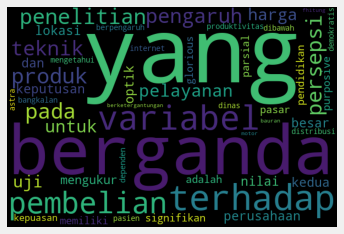

In [26]:
draw_word_cloud(0)

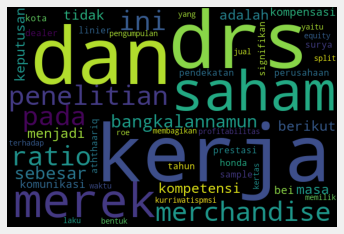

In [27]:
draw_word_cloud(1)